In [26]:
#%pip install networkx scipy matplotlib pandas datetime

In [27]:
import networkx as nx

G = nx.Graph(name = "very_cool_graph")
print(G)

Graph named 'very_cool_graph' with 0 nodes and 0 edges


In [28]:
### Adding nodes and edges to the graph

G.add_node(1)
print(G)

Graph named 'very_cool_graph' with 1 nodes and 0 edges


In [29]:
### Adding several nodes
### G.nodes is not sorted by value, but by order of addition.

nodes_to_add = [2,3,4,5,6,7,8,11,20,9]
G.add_nodes_from(nodes_to_add)
print(G)

Graph named 'very_cool_graph' with 11 nodes and 0 edges


In [30]:
### We add edges to the graph. The edges must be lists of tuples, like: [(1,2), (2,3), ...]
### each tuple indicates the couple of nodes to be connected

edges_to_add = [(1,2),(2,3),(3,4)]
G.add_edges_from(edges_to_add)
print(G)

Graph named 'very_cool_graph' with 11 nodes and 3 edges


In [31]:
### Note that the class Graph handles undirected graphs. In fact edge (1,2) and (2,1) have the same meaning.
### If you want to work with directed graphs, use the class DiGraph.

# We can examine the elements of our graph

print("list of nodes: ",list(G.nodes))

print("list of edges: ",list(G.edges))

list of nodes:  [1, 2, 3, 4, 5, 6, 7, 8, 11, 20, 9]
list of edges:  [(1, 2), (2, 3), (3, 4)]


In [32]:
### We can also see the neighbors of a node with G.adj = adjacent

nd = 2

print("neighbors of node",nd,":",list(G.adj[nd]))

neighbors of node 2 : [1, 3]


In [33]:
### Removing a node from a graph --> the edges involved are also removed

G.remove_node(2)
print(G)
print("nodes:",list(G.nodes))
print("edges:",list(G.edges))

Graph named 'very_cool_graph' with 10 nodes and 1 edges
nodes: [1, 3, 4, 5, 6, 7, 8, 11, 20, 9]
edges: [(3, 4)]


In [34]:
### Let's add again node 2 to the graph

G.add_node(2)
print(G)
print("nodes:",list(G.nodes))

Graph named 'very_cool_graph' with 11 nodes and 1 edges
nodes: [1, 3, 4, 5, 6, 7, 8, 11, 20, 9, 2]


In [35]:
### G.nodes is not sorted by value, but by order of addition.
### NetworkX does not automatically reorder nodes (either by number or label).

print(sorted(G.nodes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 20]


In [36]:
### Edges can also have a weight

weighted_edges = [(1,2,0.5), (2,3,0.2), (21,22,0.5)] #--> if the nodes are not present, they are added
G.add_weighted_edges_from(weighted_edges)
print(G)

print("nodes:",list(G.nodes))
print("edges:",list(G.edges))

for e in G.edges:
    print(e, G.get_edge_data(e[0],e[1])) # Returns the attribute dictionary associated with edge (u, v)

Graph named 'very_cool_graph' with 13 nodes and 4 edges
nodes: [1, 3, 4, 5, 6, 7, 8, 11, 20, 9, 2, 21, 22]
edges: [(1, 2), (3, 4), (3, 2), (21, 22)]
(1, 2) {'weight': 0.5}
(3, 4) {}
(3, 2) {'weight': 0.2}
(21, 22) {'weight': 0.5}


In [37]:
### We add attributes to nodes

attr = {3: {"color": "red", "size": 12}, 4: {"color": "blue"}}

# Create an attr dictionary that associates attributes with the nodes of the graph.
# The key is the node ID (3 and 4),
# The value is another dictionary with the properties (attributes) of that node.

nx.set_node_attributes(G,attr)

# Adds (or updates) the attributes of the nodes in graph G according to the attr dictionary.
# Now node 3 will have colour="red" and size=3
# Node 4 will have colour="blue"
# NetworkX stores this data in G.nodes[data=True].

print("all attributed attributes:",nx.get_node_attributes(G, "color")) # attribute "color" only

# extracts the values of a certain attribute

no = 3

print("attr of node",no,":",G.nodes[no])
print("attr color of node",no,":",G.nodes[no]['color'])
print("attr size of node",no,":",G.nodes[no]['size'])

# Display all attributes associated with that node, like a dictionary.


all attributed attributes: {3: 'red', 4: 'blue'}
attr of node 3 : {'color': 'red', 'size': 12}
attr color of node 3 : red
attr size of node 3 : 12


In [38]:
### We add attributes to edges

#the edge weight is considered as an attribute

print(G.edges[(1,2)])

edge_attr = {(1,2): {"color": "red", "visited":True}}
print(nx.set_edge_attributes(G, edge_attr))
print(G.edges[(1,2)])

{'weight': 0.5}
None
{'weight': 0.5, 'color': 'red', 'visited': True}


In [39]:
### We can obtain the adjacency matrix of the graph. 
# Note that this compact representation saves nodes only if they are connected by an edge 
#(showing the weight of the edge, if available)

adj = nx.adjacency_matrix(G)
print(adj)

<Compressed Sparse Row sparse array of dtype 'float64'
	with 8 stored elements and shape (13, 13)>
  Coords	Values
  (0, 10)	0.5
  (1, 2)	1.0
  (1, 10)	0.2
  (2, 1)	1.0
  (10, 0)	0.5
  (10, 1)	0.2
  (11, 12)	0.5
  (12, 11)	0.5


In [40]:
### To visualize the matrix, we need to render it dense (not suitable for large graphs!). 
# Note that what matters here are the indices of the nodes (not the names).

print(adj.todense())

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]]


In [41]:
### Directed Graphs

DG = nx.DiGraph()
edges_to_add = [(1,2),(2,3),(3,4),(2,1)]
DG.add_edges_from(edges_to_add)
print(DG)

DiGraph with 4 nodes and 4 edges


undirected graph


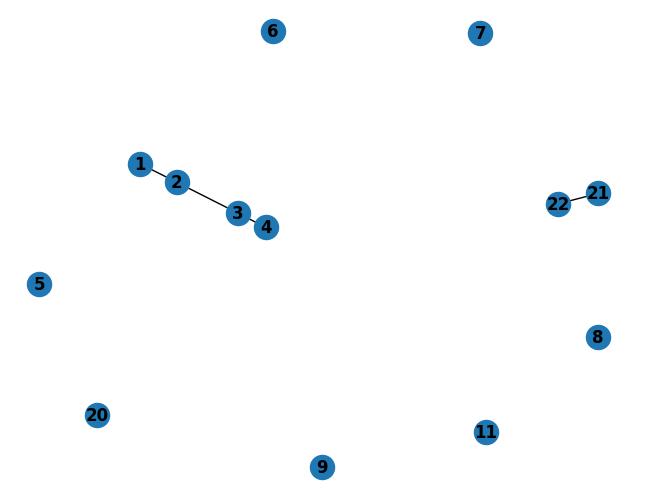

directed graph


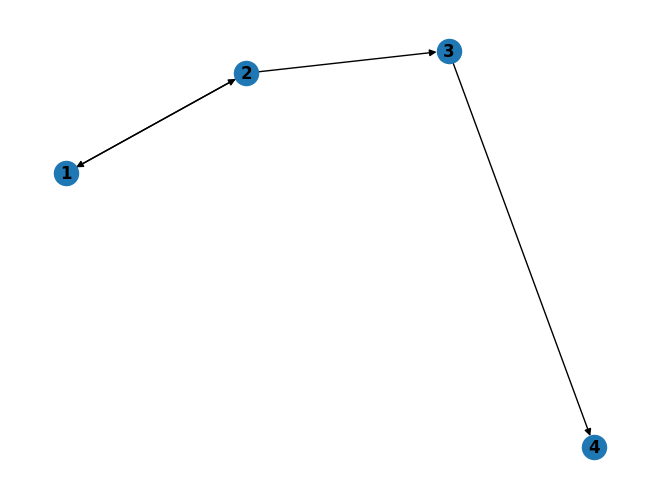

In [42]:
## Visualizing Graphs

import matplotlib.pyplot as plt

print("undirected graph")

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print("directed graph")

nx.draw(DG, with_labels=True, font_weight='bold')
plt.show()

Graph with 20 nodes and 36 edges
BA graph


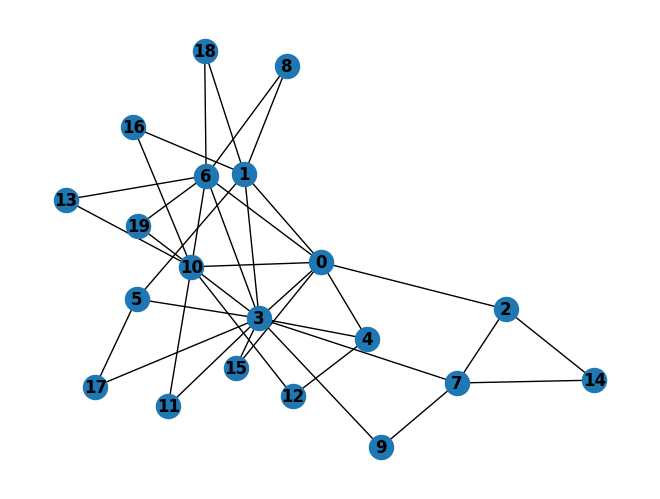

In [43]:
### Union, Intersection and Difference of Networks
# Now that we know some basics on networkX and how to visualize a graph, 
# we can now see how to perform operations on graphs. 
# We show now union, intersections and difference using random graphs, 
# we will later load a graph from file in order to perform other operations 
# and centrality measures computations.

# NetworkX has fucntions to generate graphs according to known models. 
# We use the Barabasi-Albert preferential attachment.

ba = nx.barabasi_albert_graph(20, 2)
print(ba)

print("BA graph")

nx.draw(ba, with_labels=True, font_weight='bold')
plt.show()


Graph with 20 nodes and 35 edges
ER graph


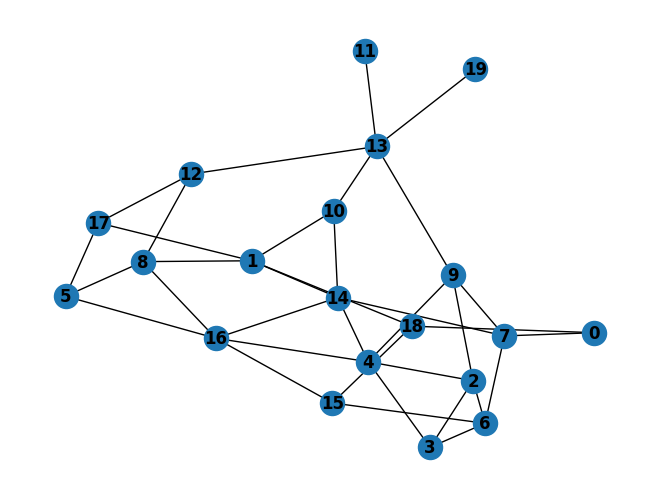

In [44]:
### Another possibility is to generate a Erdos Renyi graph.

er = nx.erdos_renyi_graph(20, 0.2) 

#-->The second parameter here (2) is the number of arcs that each new node adds when it enters the graph.

print(er)

print("ER graph")

nx.draw(er, with_labels=True, font_weight='bold')
plt.show()


Graph named 'u_ba-er' with 20 nodes and 63 edges


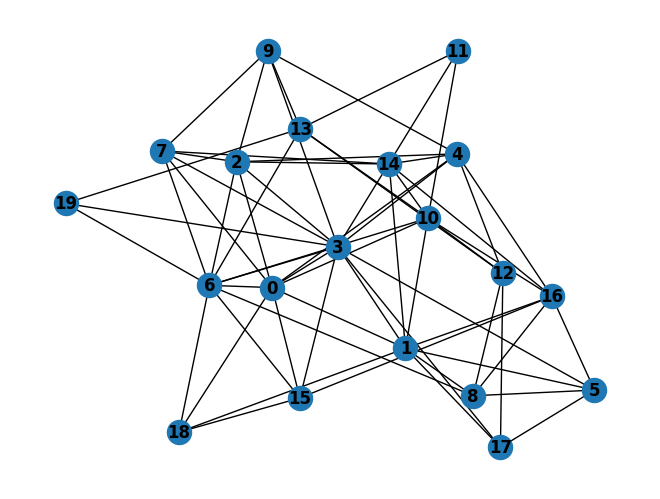

In [45]:
### Graph union 

# unisng nx.union() graphs must be disjoint (no nodes in common). 
# If this is not the case one can use the parameter *rename* to renamed the nodes 
# such that the graphs become disjoint. It is ok for this tutorial puposes.

### U = nx.union(ba, er, rename=("ba", "er")) # --> if a node has the same name in both graphs → conflict
# because NetworkX does not know which graph the attributes come from.

# better use nx.compose 

# nx.compose(G1, G2) does something different:
# •    it merges nodes with the same name
# •    if a node is in both, it is merged
# •    if an arc appears in both, only one remains
# •    attributes are merged (in case of conflict? the last graph prevails)

U = nx.compose(ba, er)

U.name = "u_ba-er"

print(U)
nx.draw(U, with_labels=True, font_weight='bold')
plt.show()

Graph named 'i_ba-er' with 20 nodes and 8 edges
edges only existing in both graphs: [(1, 18), (1, 8), (3, 4), (3, 6), (5, 17), (7, 14), (7, 9), (10, 13)]


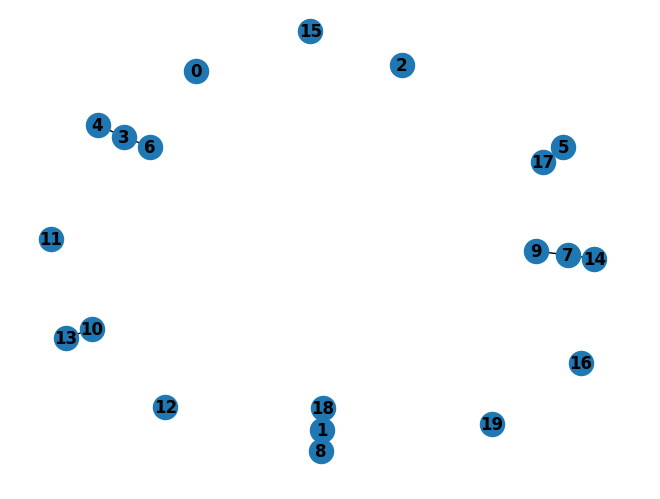

In [46]:
### Graphs intersection
# It returs a graphs that contains only the nodes and the edges that exist in both graphs. 
#It is interesting to explore what two random generated graphs share

I = nx.intersection(ba, er)

I.name = "i_ba-er"

print(I)
print("edges only existing in both graphs:",I.edges())
nx.draw(I, with_labels=True, font_weight='bold')
plt.show()

Graph with 20 nodes and 28 edges
edges existing in graph A but not in B: 28 : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 10), (0, 15), (1, 3), (1, 5), (1, 16), (2, 7), (2, 14), (3, 5), (3, 7), (3, 9), (3, 11), (3, 15), (3, 17), (3, 19), (4, 12), (6, 8), (6, 10), (6, 13), (6, 18), (6, 19), (10, 11), (10, 12), (10, 16)]


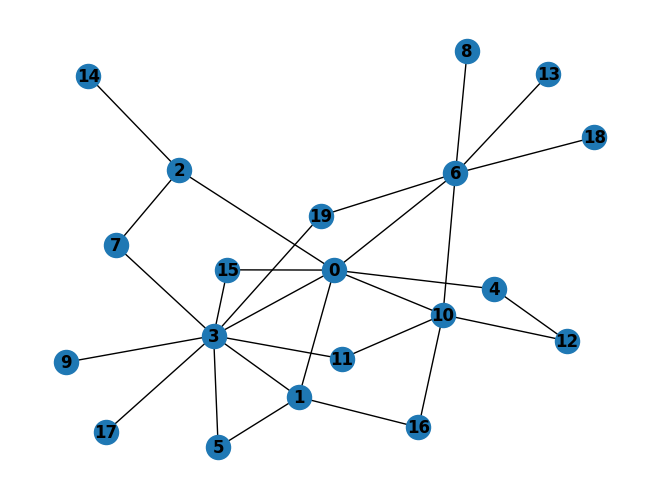

Graph with 20 nodes and 27 edges
edges existing in graph B but not in A: 27 : [(0, 7), (0, 18), (1, 10), (1, 14), (1, 17), (2, 3), (2, 4), (2, 6), (2, 9), (4, 9), (4, 14), (4, 16), (5, 8), (5, 16), (6, 7), (6, 15), (8, 12), (8, 16), (9, 13), (10, 14), (11, 13), (12, 13), (12, 17), (13, 19), (14, 16), (15, 16), (15, 18)]


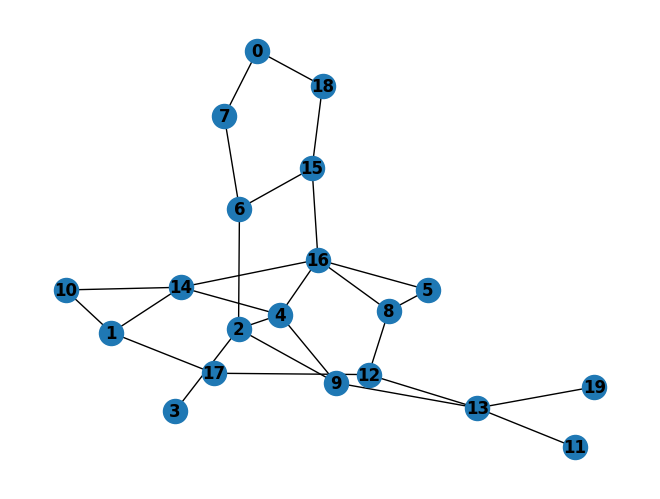

In [47]:
### Graph difference
# Returns a new graph that contains the edges that exist in the first graph but not in the second
# graph order is important
# NOTE: nodes in the two graphs must be the same

D12 = nx.difference(ba, er)

D21 = nx.difference(er, ba) #try also the opposite, which is different

print(D12)
print("edges existing in graph A but not in B:",len(D12.edges()),":",D12.edges())
nx.draw(D12, with_labels=True, font_weight='bold')
plt.show()

print(D21)
print("edges existing in graph B but not in A:",len(D21.edges()),":",D21.edges())
nx.draw(D21, with_labels=True, font_weight='bold')
plt.show()

In [48]:
### Loading a graph
# For the rest of the lab we will load and use a reduced version of the Biogrid network
#containing known protein-protein interactions

interactome = open("Biogrid_homo_1000_edgelist.txt", 'rb')

G=nx.read_edgelist(interactome)

print("Number of nodes in the interactome: " + str(len(G)) + '\n')

print("Number of edges in the interactome: " +str(G.number_of_edges()) + '\n')

FileNotFoundError: [Errno 2] No such file or directory: 'Biogrid_homo_1000_edgelist.txt'

In [ ]:
# removing self loops

G.remove_edges_from(nx.selfloop_edges(G))

print("Number of edges  with no self loops in the interactome: " +str(G.number_of_edges()) + '\n')

In [ ]:
# extract connected components and sorting them from the largest (key: number of nodes) to the smallest

print("Extracing largest connected component (LCC)..." + '\n')

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

# G.subgraph returns a graph H that contains:
# 1. only the nodes specified in nodes
# 2. only the arcs connecting those nodes that already existed in G


LCC = G.subgraph(Gcc[0])

print("Number of nodes in the LCC: " + str(len(LCC)) + '\n')

print("Number of edges in the LCC: " +str(LCC.number_of_edges()) + '\n')

nx.draw(LCC, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
### Path between two nodes
# We can both check if the path exist and compute the shortest path. 
#We are working with a connected component, so we expect the path to exist.

nx.has_path(LCC, "ADAM15", "TNKS")

path = nx.shortest_path(LCC, "ADAM15", "TNKS")

print(len(path),":",path)

In [ ]:
nx.has_path(LCC, "ADAM15", "AATF")

path = nx.shortest_path(LCC, "ADAM15", "AATF")

print(len(path),":",path)

In [ ]:
# Number of nodes and edges
num_nodes = len(path)
num_edges = len(path) - 1  # edges are always one less than nodes

print(f"Nodes in the path ({num_nodes}): {path}")
print(f"Edges in the path ({num_edges}):")

# Print each edge in the path
for i in range(num_edges):
    print(f"{path[i]} — {path[i+1]}")

In [ ]:
# Shortest path length in terms of edges DIRECT FUNCTION shortest_path_length

num_edges = nx.shortest_path_length(LCC, source="ADAM15", target="AATF")

print("Number of edges in the shortest path:", num_edges)

In [ ]:
### Create and visualize a subgraph given a node and its first neighbors

# nod = "AP1G2"
nod = "XRN1"
# nod = "SNX9"

nodes_to_viz = [nod] + list(LCC.adj[nod]) # --> .adj[n] reports all nodes connected to n

print("node:",nod,";","neighbors of",nod,":",list(LCC.adj[nod]))

nodes_to_viz

sub_LCC = LCC.subgraph(nodes_to_viz) # --> will include all edges between these selected nodes

color_map = ['red' if node == nod else 'green' for node in sub_LCC]

nx.draw(sub_LCC, with_labels=True, node_color = color_map, font_weight='bold')


In [ ]:
### Graph measures
# We now explore some global and local graph measures. 
# Global measures are referred to properties related to the whole graph
# while local measures are centrality measures computed for nodes (or edges)
# Those measures are extremely useful when looking for important/central nodes in a given graph
# There are many centrality measures, each one with a different biological interpretation. 

### Gloabal measures

# Compute **average shortest path length**: 
# compute all the shortest path from all nodes to all others and average:

apl = nx.average_shortest_path_length(LCC)

print("Avg shortest path length: ", apl)


In [ ]:
### Average degree: average number of connected edges for any node 
# (relevant in random graphs, not relevant in scale-free graphs)

degrees = LCC.degree()

print(degrees,"\n")

avg_degree = sum(dict(degrees).values())/LCC.number_of_nodes()

print("Avg degree: ", avg_degree)


In [ ]:
### **Average clustering coefficient**
#this measures the extent to which nodes tend to cluster together in the graph

avg_cluster = nx.average_clustering(LCC)

print("Avg clustering coefficient: ", avg_cluster)


In [ ]:
###Eccentricy: maximun among all minimum distances between a vertex to all other vertices.
# Example:
# d(A,B)=1, d(A,C)=2, d(A,D)=3
# ecc(A) = max(1,2,3) = 3

ecc = nx.eccentricity(LCC)
print("eccentricity: ", ecc)

In [ ]:
### Radius: minimum graph eccentricity of any graph vertex in a graph.

radius = nx.radius(LCC)

print("radius: ", radius)

In [ ]:
### Diameter: maximum eccentricity of any vertex in the graph.

diameter = nx.diameter(LCC)

print("diameter: ", diameter)


In [ ]:
### Center: set of nodes with minumun eccentricity (i.e. radius).

center = nx.center(LCC)

print("center: ", center)

In [ ]:
nx.draw(LCC.subgraph(center), with_labels=True, font_weight='bold')

plt.show()

In [ ]:
### Periphery: set of nodes with eccentricity equal to the diameter. 

per = nx.periphery(LCC)

print("periphery: ", per)

nx.draw(LCC.subgraph(per), with_labels=True, font_weight='bold')

plt.show()


In [ ]:
### Density

density = nx.density(LCC)

print("density: ", density)

In [ ]:
### Computing local centrality metrics

from datetime import datetime
import pandas as pd

# computing degree

print("Computing centralities with networkx..." + '\n')

starttime = datetime.now()

### DEGREE CENTRALITY
      
#degr_c = nx.degree_centrality(LCC)

#endtime = datetime.now()
#elapsedtime = endtime - starttime

#print("Elapsed time to degree centrality computation: " + str(elapsedtime) + '\n')

### BETWEENNEESS CENTRALITY

between = nx.betweenness_centrality(LCC)

endtime = datetime.now()
elapsedtime = endtime - starttime

print("Elapsed time to betweenness computation: " + str(elapsedtime) + '\n')

### CLOSENESS CENTRALITY

close = nx.closeness_centrality(LCC)

endtime = datetime.now()
elapsedtime = endtime - starttime

print("Elapsed time to closeness computation: " + str(elapsedtime) + '\n')

### EIGENVECTOR CENTRALITY

eigen = nx.eigenvector_centrality(LCC)

endtime = datetime.now()
elapsedtime = endtime - starttime

print("Elapsed time to eigenvector centrality computation: " + str(elapsedtime) + '\n')

### DEGREE

deg = LCC.degree()

endtime = datetime.now()
elapsedtime = endtime - starttime

print("Elapsed time to degree computation: " + str(elapsedtime) + '\n')

# stop timing

endtime = datetime.now()

elapsedtime = endtime - starttime

print("Total elapsed time: " + str(elapsedtime) + '\n')

# saving results

dataset_name_nx = "Biogr_centr_res_NOW_networkx.csv"

print("Saving results to file",dataset_name_nx,'\n')

# build a dataframe with all metrics
df = pd.DataFrame({
    "Node": list(LCC.nodes()),
    "degree": [deg[n] for n in LCC],
    "betweenness": [between[n] for n in LCC],
    "closeness": [close[n] for n in LCC],
    "eigenvector_centr": [eigen[n] for n in LCC],
})

# Show preview on console
#print(df.head())

# Sort by degree descending
df_sorted = df.sort_values(by="degree", ascending=False)

# Print header once
print("Node, degree, betweenness, closeness, eigenvector_centr")

# Print the first 50 rows
for idx, row in df_sorted.head(50).iterrows():
    print(f"{row['Node']}, {row['degree']}, {row['betweenness']}, {row['closeness']}, {row['eigenvector_centr']}")

# Save to CSV

df.to_csv(dataset_name_nx, index=False)

print("\nSaved to",dataset_name_nx)



#result_file = open('Biogrid_homo_1000_centr_results.txt', 'w')

#print("Node, degree, betweenness, closeness, eigenvector_centr")
#print("Node, degree, betweenness, closeness, eigenvector_centr", file = result_file)

#for n in LCC:
#    print((n, deg[n], between[n], close[n], eigen[n]))
#    print((n, deg[n], between[n], close[n], eigen[n]), file = result_file)
    
#result_file.close()

print()
print("Game over" +'\n')

In [ ]:
### Layouts

# Define different layouts

# Define different layouts
layouts = {
    "Spring layout": nx.spring_layout(LCC, seed=42),  # deterministic layout
    "Circular layout": nx.circular_layout(LCC),
    "Kamada-Kawai layout": nx.kamada_kawai_layout(LCC)
}

# Plot the graph using each layout
plt.figure(figsize=(18, 6))  # wider figure for better readability

for i, (name, layout) in enumerate(layouts.items(), 1):
    plt.subplot(1, 3, i)
    nx.draw(
        LCC, 
        pos=layout, 
        with_labels=True,          # show node labels (protein names)
        node_color='lightblue', 
        edge_color='gray', 
        node_size=600, 
        font_size=9,
        font_weight='bold'
    )
    plt.title(name)

plt.tight_layout()
plt.show()

NameError: name 'LCC' is not defined

In [ ]:
# Layout for large graphs

pos = nx.spring_layout(LCC, k=0.8, iterations=200, seed=42)  # k controls spacing

plt.figure(figsize=(18, 18))  # large figure for clarity
nx.draw(
    LCC,
    pos=pos,
    with_labels=True,   
    node_size=50,        # smaller nodes
    node_color='skyblue',
    edge_color='gray',
    alpha=0.6            # slightly transparent edges
)
plt.title("LCC - Spring layout for larger graphs (~1000 nodes)")
plt.show()

In [ ]:
%%bash
echo "current folder:"
pwd
ls -l

In [ ]:
%pip install igraph

In [ ]:
### iGraph centralities

from igraph import Graph
from datetime import datetime

# Ensure NetworkX nodes have 'name' attribute
for n in LCC.nodes():
    LCC.nodes[n]["name"] = n

# Manual conversion from NetworkX to igraph
LCC_igraph = Graph()
LCC_igraph.add_vertices(list(LCC.nodes()))  # add nodes with their names
LCC_igraph.vs["name"] = [n for n in LCC.nodes()]  # set the 'name' attribute

# Add edges
LCC_igraph.add_edges(list(LCC.edges()))

starttime = datetime.now()

### BETWEENNESS CENTRALITY (normalized)
n = LCC_igraph.vcount()
between = LCC_igraph.betweenness()
between_norm = [b / ((n-1)*(n-2)/2) for b in between]
print("Elapsed time to betweenness computation: " + str(elapsedtime) + '\n')

### CLOSENESS CENTRALITY
close = LCC_igraph.closeness()
endtime = datetime.now()
elapsedtime = endtime - starttime
print("Elapsed time to closeness computation: " + str(elapsedtime) + '\n')

### EIGENVECTOR CENTRALITY
#eigen = LCC_igraph.eigenvector_centrality()

# eigenvector centrality in igraph, normalized to L2 = 1 like NetworkX
eigen = LCC_igraph.eigenvector_centrality()
# normalize to sum of squares = 1
norm = sum([x**2 for x in eigen])**0.5
eigen_l2 = [x / norm for x in eigen]
# note that small differences still exist, after several decimals

endtime = datetime.now()
elapsedtime = endtime - starttime
print("Elapsed time to eigenvector centrality computation: " + str(elapsedtime) + '\n')

### DEGREE
deg = LCC_igraph.degree()
endtime = datetime.now()
elapsedtime = endtime - starttime
print("Elapsed time to degree computation: " + str(elapsedtime) + '\n')

# stop timing
endtime = datetime.now()
elapsedtime = endtime - starttime
print("Total elapsed time: " + str(elapsedtime) + '\n')


# saving results

dataset_name_ig = "Biogr_centr_res_NOW_igraph.csv"

print("Saving results to file",dataset_name_ig,'\n')

# build a dataframe with all metrics
df = pd.DataFrame({
    "Node": list(LCC.nodes()),
    "degree": [deg[LCC_igraph.vs.find(name=n).index] for n in LCC],
    "betweenness": [between_norm[LCC_igraph.vs.find(name=n).index] for n in LCC],  # <--- normalized
    "closeness": [close[LCC_igraph.vs.find(name=n).index] for n in LCC],
    "eigenvector_centr": [eigen_l2[LCC_igraph.vs.find(name=n).index] for n in LCC],
})


# Sort by degree descending
df_sorted = df.sort_values(by="degree", ascending=False)

# Print header once
print("Node, degree, betweenness, closeness, eigenvector_centr")

# Print the first 50 rows
for idx, row in df_sorted.head(50).iterrows():
    print(f"{row['Node']}, {row['degree']}, {row['betweenness']}, {row['closeness']}, {row['eigenvector_centr']}")

# Save to CSV

df.to_csv(dataset_name_ig, index=False)

print("\nSaved to",dataset_name_ig)



############

# saving results

#dataset_name_ig = "centr_res_igraph.csv"

#print("Saving results to file",dataset_name_ig,'\n')

#with open(dataset_name_ig, 'w') as result_file_ig:
#    header = "Node, degree, betweenness, closeness, eigenvector_centr"
#    print(header)
#    print(header, file=result_file_ig)

#    for i, v in enumerate(LCC_igraph.vs):
#        line = (v["name"], deg[i], between_norm[i], close[i], eigen[i])
#        print(line)
#        print(line, file=result_file_ig)

print()
print("Game over for iGraph" + '\n')

In [ ]:
### Comparing Networkx and iGraph speeds

import networkx as nx
from igraph import Graph
from datetime import datetime
import random

# Assume LCC is already a NetworkX graph
nodes = list(LCC.nodes())

### ------------------------------
### NetworkX - normalized betweenness
### ------------------------------
start_nx = datetime.now()

# Compute normalized betweenness centrality using NetworkX
between_nx = nx.betweenness_centrality(LCC, normalized=True)

end_nx = datetime.now()
time_nx = (end_nx - start_nx).total_seconds()
print(f"NetworkX betweenness computation time: {time_nx:.4f} s")

### ------------------------------
### iGraph - normalized betweenness
### ------------------------------
# Convert NetworkX graph to iGraph
# Make sure node names are preserved

for n in LCC.nodes():
    LCC.nodes[n]["name"] = n

LCC_igraph = Graph()
LCC_igraph.add_vertices(list(LCC.nodes()))
LCC_igraph.vs["name"] = list(LCC.nodes())
LCC_igraph.add_edges(list(LCC.edges()))

start_ig = datetime.now()

# Compute raw betweenness centrality in iGraph
between_ig = LCC_igraph.betweenness()

# Normalize betweenness as NetworkX does
n = LCC_igraph.vcount()
between_ig_norm = [b / ((n-1)*(n-2)/2) for b in between_ig]

end_ig = datetime.now()
time_ig = (end_ig - start_ig).total_seconds()
print(f"iGraph betweenness computation time: {time_ig:.4f} s")

### ------------------------------
### Speed comparison
### ------------------------------
if time_ig > 0:
    speed_ratio = time_nx / time_ig
    print(f"\niGraph is approximately {speed_ratio:.2f} times faster than NetworkX")
else:
    print("\niGraph is practically instantaneous compared to NetworkX")

### ------------------------------
### Show betweenness values for 10 random nodes
### ------------------------------
sample_nodes = random.sample(nodes, 10)
print("\nNode\tNetworkX\t iGraph")
for node in sample_nodes:
    idx = LCC_igraph.vs.find(name=node).index
    print(f"{node}\t{between_nx[node]:.6f}\t{between_ig_norm[idx]:.6f}")

In [ ]:
%%bash
pwd